<a href="https://colab.research.google.com/github/neerajsk911/Unemployment-Rates-Analysis-Covid19-India/blob/main/FDS_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Unemployment Rates : Pre and Post Covid19 Analysis - Group 5 - 19CSE304***

In [ ]:
!pip install --upgrade plotly
!pip install pyyaml==5.4.1

## ***Data Preprocessing***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (15,9)
sns.set()

In [ ]:
dataset=pd.read_csv("Unemployment_Rate_M_Total.csv")
dataset.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,31-01-2016,M,17.91,20626291.0,62.67
1,Andhra Pradesh,29-02-2016,M,9.98,19334918.0,53.50
2,Andhra Pradesh,31-03-2016,M,10.72,19646970.0,54.73
3,Andhra Pradesh,30-04-2016,M,5.51,18929583.0,49.76
4,Andhra Pradesh,31-05-2016,M,6.29,21163390.0,56.02


In [ ]:
columns=[" Date","Region"," Estimated Employed"," Estimated Labour Participation Rate (%)"," Estimated Unemployment Rate (%)"]
dataset=dataset[columns]
dataset.columns=["Date","Region","Est_emp","Est_LPR","Unemp_rate"]
dataset.tail()

,Date,Region,Est_emp,Est_LPR,Unemp_rate
1872,30-06-2021,India,383469051.0,39.59,9.17
1873,31-07-2021,India,399714145.0,40.21,6.96
1874,31-08-2021,India,397784327.0,40.52,8.32
1875,30-09-2021,India,406241924.0,40.66,6.86
1876,31-10-2021,India,400778431.0,40.41,7.75


### ***Checking Missing Dates***

In [ ]:
states=np.unique(dataset["Region"].values)
for state in states:
  count=dataset['Date'].loc[dataset['Region']==state].values.shape[0]
  print(f"{state}: {count}\n" if count<70 else "",end="")

Goa: 69
Jammu & Kashmir: 69
Meghalaya: 46
Sikkim: 34
Tripura: 49


In [ ]:
dataset.loc[dataset["Region"]=="Sikkim"].head()

,Date,Region,Est_emp,Est_LPR,Unemp_rate
1374,30-09-2018,Sikkim,280884.0,58.62,11.25
1375,31-10-2018,Sikkim,207652.0,43.66,12.14
1376,30-11-2018,Sikkim,258027.0,49.87,4.69
1377,31-01-2019,Sikkim,274484.0,57.97,13.24
1378,28-02-2019,Sikkim,227220.0,45.28,8.30


## ***Filling Missing Dates***

In [ ]:
dates=dataset.loc[dataset["Region"]=="Andhra Pradesh"]["Date"].values

for state in states:
  ap_dates=dataset.loc[dataset["Region"]==state]["Date"].values

  if(len(ap_dates)!=70):
    ap_unemp_mean=round(dataset.loc[dataset["Region"]==state]["Unemp_rate"].values.mean(),2)
    ap_emp_mean=round(dataset.loc[dataset["Region"]==state]["Est_emp"].values.mean(),2)
    ap_lpr_mean=round(dataset.loc[dataset["Region"]==state]["Est_LPR"].values.mean(),2)

    ap_list=[ap_emp_mean, ap_lpr_mean ,ap_unemp_mean]

    ind=dataset[dataset["Region"]==state].index[0]
    
    for i in range(dates.shape[0]):
      if dates[i] not in ap_dates:
        r0=np.concatenate((np.array([dates[i]]),np.array([state])),axis=None)
        r1=np.concatenate((r0,ap_list),axis=None)
        r1=r1.reshape(1,5)
        r1=pd.DataFrame(r1,columns=dataset.columns)
        dataset=pd.concat([dataset.iloc[:ind+i],r1,dataset.iloc[ind+i:]],axis=0).reset_index(drop=True)

In [ ]:
dataset["Date"]=pd.to_datetime(dataset["Date"])

In [ ]:
dataset.loc[dataset["Region"]=="Sikkim"].head()

,Date,Region,Est_emp,Est_LPR,Unemp_rate
1400,2016-01-31,Sikkim,253278.68,47.76,6.52
1401,2016-02-29,Sikkim,253278.68,47.76,6.52
1402,2016-03-31,Sikkim,253278.68,47.76,6.52
1403,2016-04-30,Sikkim,253278.68,47.76,6.52
1404,2016-05-31,Sikkim,253278.68,47.76,6.52


# ***Processing Data for Regression | Analysis of Linear Regression on the Data***

In [ ]:
import datetime as dt
dates_ordinal=pd.to_datetime(dataset["Date"]).map(dt.datetime.toordinal)

In [ ]:
df=pd.DataFrame()
df=dataset.copy()

df["Date"]=dates_ordinal

In [ ]:
test_state="Bihar"
df=df.loc[df["Region"]==test_state]

In [ ]:
X=df.drop(columns=["Region","Unemp_rate"]).values

In [ ]:
X_train=X[:36]
X_test=X[36:48]
Y=df["Unemp_rate"].values
Y_train=Y[:36]
Y_test=Y[36:48]
Y_test=np.array(Y_test,dtype="float")

In [ ]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression().fit(X_train,Y_train)
Y_pred=reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

print(f"MAE: {mean_absolute_error(Y_test,Y_pred)}")
print(f"MSE: {mean_squared_error(Y_test,Y_pred)}")
print(f"R2 Score: {r2_score(Y_test,Y_pred)}")

MAE: 0.07413443107576019
MSE: 0.008532392874441318
R2 Score: 0.9953023361909877


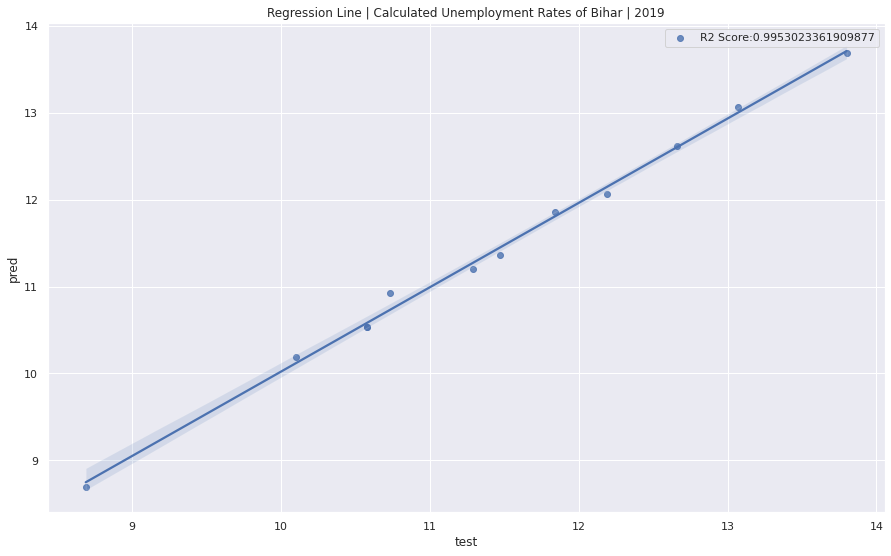

In [ ]:
reg_data=pd.DataFrame()
reg_data["test"]=Y_test
reg_data["pred"]=Y_pred
plt.title(f"Regression Line | Calculated Unemployment Rates of {test_state} | 2019")
sns.regplot(data=reg_data,x="test",y="pred",label=f"R2 Score:{r2_score(Y_test,Y_pred)}")
plt.legend()

# ***Linear Regression***

In [ ]:
char_dates=dataset["Date"].loc[dataset["Region"]=="Andhra Pradesh"].values

In [ ]:
result=pd.DataFrame()

for state in states:
  dates_ordinal=pd.to_datetime(dataset["Date"]).map(dt.datetime.toordinal)
  df=pd.DataFrame()
  df=dataset.copy()

  df2=pd.DataFrame()

  df["Date"]=dates_ordinal
  df=df.loc[df["Region"]==state]
  X=df.drop(columns=["Region","Unemp_rate"]).values

  X_train=X[:48]
  X_test=X[48:]
  Y=df["Unemp_rate"].values
  Y_train=Y[:48]
  Y_test=Y[48:]
  Y_test=np.array(Y_test,dtype="float")

  df2["Dates"]=char_dates[48:]
  df2["Region"]=[state]*df2["Dates"].values.shape[0]
  df2["Observed"]=Y_test

  res=LinearRegression().fit(X_train,Y_train)
  Y_pred=res.predict(X_test)
  df2["Predicted"]=Y_pred
  result=pd.concat([result,df2],axis=0)

In [ ]:
result.head()

,Dates,Region,Observed,Predicted
0,2020-01-31,Andhra Pradesh,5.48,5.298395
1,2020-02-29,Andhra Pradesh,5.83,5.570096
2,2020-03-31,Andhra Pradesh,5.79,5.638727
3,2020-04-30,Andhra Pradesh,20.51,14.643114
4,2020-05-31,Andhra Pradesh,17.43,13.354860


## ***Inferences and Results***

In [ ]:
import plotly.express as px

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


### ***Statewise Report***

In [ ]:
current_state="Andhra Pradesh"
checks=result[["Dates","Predicted","Observed"]].loc[result["Region"]==current_state]

fig=px.line(checks,x="Dates",y=["Observed","Predicted"],title=f"Comparing the effects of Covid 19 | {current_state}")

labels=[]

for state in states:
  checks=result[["Dates","Predicted","Observed"]].loc[result["Region"]==state]
  labels.append(
        dict(
            label=state[:2],
            method="update",
            args=[{"y": [checks["Observed"], checks["Predicted"]]},{"title":f"Comparing the effects of Covid 19 | {state}"}]
        ),
    )

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            # x=0.7,
            x=1.1,
            y=1.15,
            pad={"r": 10, "t": 10},
            showactive=True,
            buttons=labels
        )
    ]
)
fig.show()

In [ ]:
plot_ump = result[['Observed','Region']]
df_unemp = plot_ump.groupby('Region').mean().reset_index()
df_unemp = df_unemp.sort_values('Observed')
fig = px.bar(df_unemp, x='Region',y='Observed',color='Region',
            title='Statewise Average Observed Unemployment Rate | Post Covid19 Outbreak | 2020-21',template='ggplot2')
fig.show()

In [ ]:
plot_ump = result[['Predicted','Region']]
df_unemp = plot_ump.groupby('Region').mean().reset_index()
df_unemp = df_unemp.sort_values('Predicted')
fig = px.bar(df_unemp, x='Region',y='Predicted',color='Region',
            title='Statewise Average Expected Unemployment Rates | Without Covid 19 | 2020-21',template='simple_white')
fig.show()

In [ ]:
final=pd.DataFrame()
final["Region"]=result["Region"].values
final["Diff"]=result["Observed"].values-result["Predicted"].values

In [ ]:
plot_ump = final
df_unemp = plot_ump.groupby('Region').mean().reset_index()
df_unemp = df_unemp.sort_values('Diff')
fig = px.bar(df_unemp, x='Region',y='Diff',color='Region',
            title='Statewise effect of Covid-19 on Unemployment | 2020-21',template='plotly')
fig.show()

# ***Submitted By***
## ***Neeraj S Kumar***
## ***AM.EN.U4CSE19238***